# Assignment 4
By Harsha Mangnani (hm495)

# Install Packages

In [3]:
!pip install sklearn
!pip install scikit-learn
!pip install cvxopt

# import packages

In [4]:
import numpy as np
import pandas as pd
import cvxopt
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import confusion_matrix

c:\users\hkman\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


# Load the dataset

In [5]:
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

# How data looks like

In [6]:
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [7]:
print(iris.data.shape)

(150, 4)


In [8]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [9]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [10]:
print(iris.target)

#0 is setosa, 1 is versicolor, 2 is virginica

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [11]:
print(iris.target.shape)

(150,)


# Convert it to pandas dataframe

In [12]:
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
x= iris.data[:, :2]  # we only take the Sepal two features.
y= iris.target
print(x.shape)
print(y.shape)

(150, 2)
(150,)


# Use only first two columns as classifiers i.e. sepal length and sepal width

# target is outcome or predicted variable

# Split data into train and test set

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [15]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(105, 2) (45, 2)
(105,) (45,)


# Supervised learning  - 1. KNN classification

In [16]:
classifier = KNeighborsClassifier(n_neighbors=5)

In [17]:
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

# Testing the classifier

In [18]:
predict = classifier.predict(x_test)

# Count how many were correctly classified

In [19]:
correct = np.where(predict == y_test,1,0).sum()
print(correct)

33


In [20]:
print('accuracy: ', correct/len(y_test))

accuracy:  0.7333333333333333


In [21]:
#start with an array where results will be stored

results=[]

In [22]:
for k in range(1,51,1):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train,y_train)
    predict = classifier.predict(x_test)
    correct = np.where(predict == y_test,1,0).sum()
    accuracy = correct/len(y_test)
    print("k = ",k, " Accuracy = ", accuracy)
    results.append([k,accuracy])

k =  1  Accuracy =  0.7333333333333333
k =  2  Accuracy =  0.7333333333333333
k =  3  Accuracy =  0.7777777777777778
k =  4  Accuracy =  0.7777777777777778
k =  5  Accuracy =  0.7333333333333333
k =  6  Accuracy =  0.7555555555555555
k =  7  Accuracy =  0.7777777777777778
k =  8  Accuracy =  0.8222222222222222
k =  9  Accuracy =  0.8222222222222222
k =  10  Accuracy =  0.7777777777777778
k =  11  Accuracy =  0.8222222222222222
k =  12  Accuracy =  0.8444444444444444
k =  13  Accuracy =  0.8222222222222222
k =  14  Accuracy =  0.8222222222222222
k =  15  Accuracy =  0.8222222222222222
k =  16  Accuracy =  0.8222222222222222
k =  17  Accuracy =  0.8222222222222222
k =  18  Accuracy =  0.8222222222222222
k =  19  Accuracy =  0.8444444444444444
k =  20  Accuracy =  0.8222222222222222
k =  21  Accuracy =  0.8222222222222222
k =  22  Accuracy =  0.8222222222222222
k =  23  Accuracy =  0.8444444444444444
k =  24  Accuracy =  0.8444444444444444
k =  25  Accuracy =  0.8666666666666667
k =  26  

In [23]:
results=pd.DataFrame(results,columns=["k","accuracy"])
results.head()

,k,accuracy
0,1,0.733333
1,2,0.733333
2,3,0.777778
3,4,0.777778
4,5,0.733333


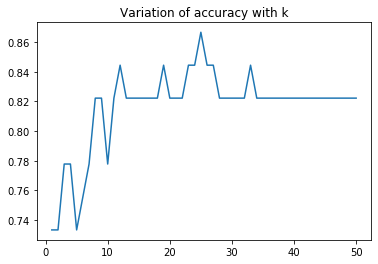

In [24]:
plt.plot(results.k, results.accuracy)
plt.title("Variation of accuracy with k")
plt.show()

# Supervised learning  -  2. SVM Classification

In [25]:
# Model Accuracy: how often is the classifier correct?

Accuracy of linear kernel : 0.8444444444444444
[-2.02356896  2.27766272]


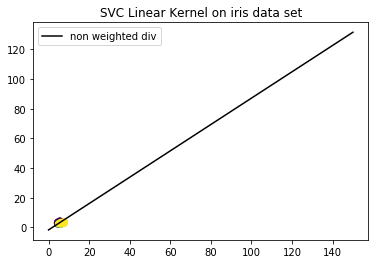

In [26]:
clf = svm.SVC(kernel='linear') # SVC with Linear Kernel
clf.fit(x_train, y_train)
clf_pred = clf.predict(x_test)
clf_accuracy =  metrics.accuracy_score(y_test, clf_pred)
print("Accuracy of linear kernel :",clf_accuracy)


w = clf.coef_[0]
print(w)

a = -w[0] / w[1]

xx = np.linspace(0,150)
yy = a * xx - clf.intercept_[0] / w[1]

h0 = plt.plot(xx, yy, 'k-', label="non weighted div")

plt.scatter(x[:, 0], x[:, 1], c = y)
plt.legend()
plt.title("SVC Linear Kernel on iris data set")
plt.show()

In [29]:
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7) # SVC with RBF kernel
rbf_svc.fit(x_train, y_train)
rbf_svc_pred = rbf_svc.predict(x_test)
rbf_accuracy = metrics.accuracy_score(y_test, rbf_svc_pred)
print("Accuracy of radial basis function kernel :", rbf_accuracy)

Accuracy of radial basis function kernel : 0.8


In [30]:
poly_svc = svm.SVC(kernel='poly', degree=3) # SVC with polynomial (degree 3) kernel
poly_svc.fit(x_train, y_train)
poly_svc_pred = poly_svc.predict(x_test)
poly_accuracy = metrics.accuracy_score(y_test, poly_svc_pred)
print("Accuracy of polynomial kernel :", poly_accuracy)

Accuracy of polynomial kernel : 0.8222222222222222


In [ ]:
svm = SVM()
svm.fit(x_train, y_train)